## Data Description
1. **Data Source**:  
   Synthetic data generated from the Wharton Class (University of Pennsylvania) of 2025's statistics.  
   Dataset: [https://www.kaggle.com/datasets/taweilo/mba-admission-dataset/data](https://www.kaggle.com/datasets/taweilo/mba-admission-dataset/data)

2. **Meta Data**:
   * **application_id**: Unique identifier for each application
   * **gender**: Applicant's gender (Male, Female)
   * **international**: International student (TRUE/FALSE)
   * **gpa**: Grade Point Average of the applicant (on a 4.0 scale)
   * **major**: Undergraduate major (Business, STEM, Humanities)
   * **race**: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
   * **gmat**: GMAT score of the applicant (up to 800 points)
   * **work_exp**: Number of years of work experience (Year)
   * **work_industry**: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)
   * **admission**: Admission status (Admit, Waitlist, Null: Deny)

**Perform Exploratory Data Analysis (EDA) and explore the relationships between variables and identify patterns and trends in the data.**


# Importing Libraries

In [266]:
!pip install kagglehub
import kagglehub # for downloading the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import os
%matplotlib inline

# Data Importation

In [268]:
# Download the latest version of the dataset
path = kagglehub.dataset_download("taweilo/mba-admission-dataset")

# Checking the contents of the directory
dataset_directory = path
print("Contents of the dataset directory:", os.listdir(dataset_directory))

# The CSV file is named 'MBA.csv'
csv_file_path = os.path.join(dataset_directory, 'MBA.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

Contents of the dataset directory: ['MBA.csv']


# Data Overview

In [270]:
# General overview of the dataset
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
df.head(5)

Shape of the dataset: (6194, 10)

Data Types:
 application_id      int64
gender             object
international        bool
gpa               float64
major              object
race               object
gmat              float64
work_exp          float64
work_industry      object
admission          object
dtype: object


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


# Basic Statistical Summary

In [272]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
application_id,6194.0,3097.500000,1788.198115,1.00,1549.25,3097.50,4645.75,6194.00
gpa,6194.0,3.250714,0.151541,2.65,3.15,3.25,3.35,3.77
gmat,6194.0,651.092993,49.294883,570.00,610.00,650.00,680.00,780.00
work_exp,6194.0,5.016952,1.032432,1.00,4.00,5.00,6.00,9.00


# Missing Values

In [274]:
# Checking for missing values
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

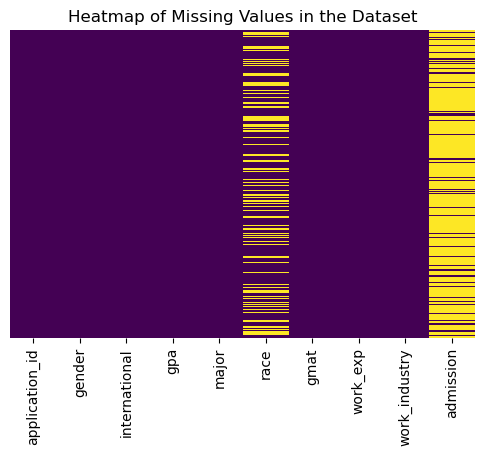

In [275]:
# Heatmap of Missing Values
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in the Dataset")
plt.show()

In [276]:
# Handling NULL values in Race and Admission
df["race"] = df["race"].fillna("Unknown")
df["admission"] = df["admission"].fillna("Deny")
df.head(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


# Checking for duplicates

In [278]:
# Check for duplicates
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

- GPA Distribution

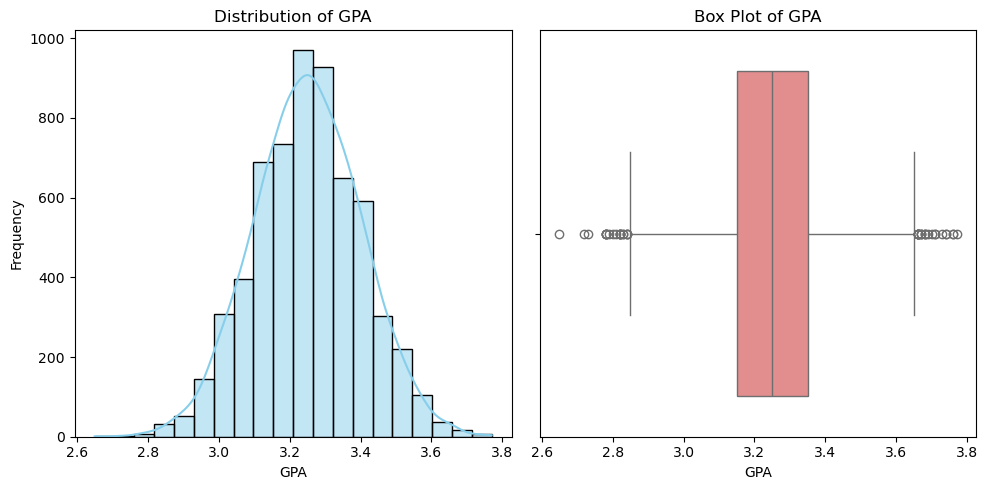

In [281]:
# Set up the 1x2 grid for plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram plot
sns.histplot(df['gpa'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of GPA')
axes[0].set_xlabel('GPA')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['gpa'], color='lightcoral', ax=axes[1])
axes[1].set_title('Box Plot of GPA')
axes[1].set_xlabel('GPA')

# Plot display
plt.tight_layout()
plt.show()


This histogram displays the distribution of GPA scores in the dataset. With a range of bins set to 20 and a KDE (Kernel Density Estimate) line overlaid, we get a clear sense of both the spread and density of GPA values. The plot shows a concentration of GPAs near the center (3.25), indicating that most students have a GPA within a particular range. The boxplot also shows that the data is normal distributed, indicated by a central median line and relatively symmetrical interquartile range (IQR). However, the plot also shows outliers, represented as individual points outside the whiskers.

- GMAT Distribution

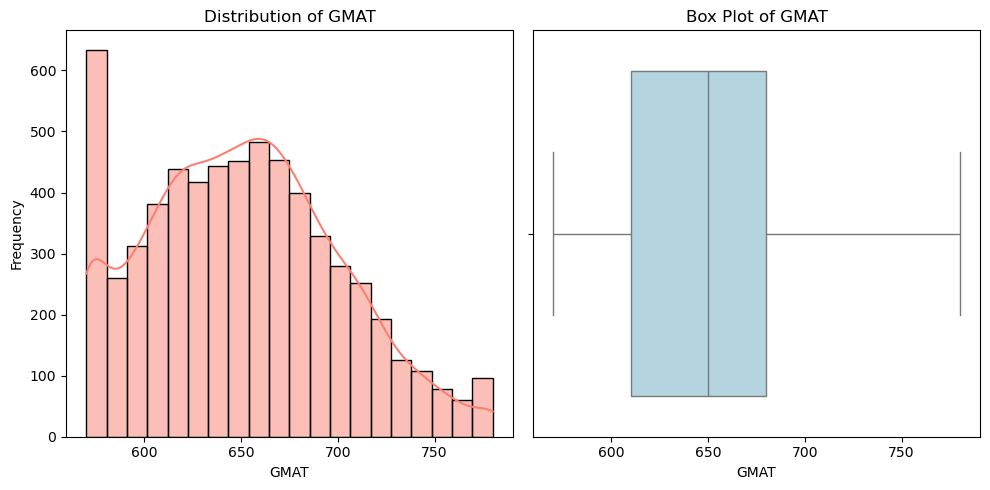

In [284]:
# Set up the 1x2 grid for plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram plot
sns.histplot(df['gmat'], bins=20, kde=True, color='salmon', ax=axes[0])
axes[0].set_title('Distribution of GMAT')
axes[0].set_xlabel('GMAT')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['gmat'], color='lightblue', ax=axes[1])
axes[1].set_title('Box Plot of GMAT')
axes[1].set_xlabel('GMAT')

# Plot display
plt.tight_layout()
plt.show()


The distribution shows that a greater number of GMAT scores are concentrated on the left side. This left-skewed box plot of GMAT scores with respect to admission shows a concentration of higher scores among applicants, with a few lower scores pulling the distribution slightly to the left. The absence of outliers suggests consistency across the GMAT scores, with no extreme variations.

- Admission Status

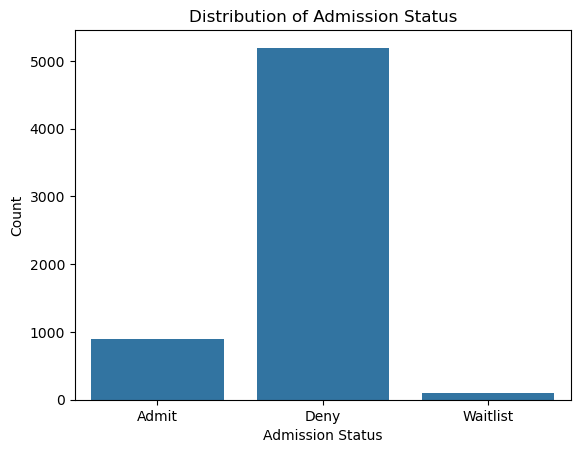

In [287]:
# Create a count plot for admission status
sns.countplot(data=df, x='admission')

# Adding titles and labels
plt.title('Distribution of Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('Count')

# Display the plot
plt.show()

- Gender and Admission Status

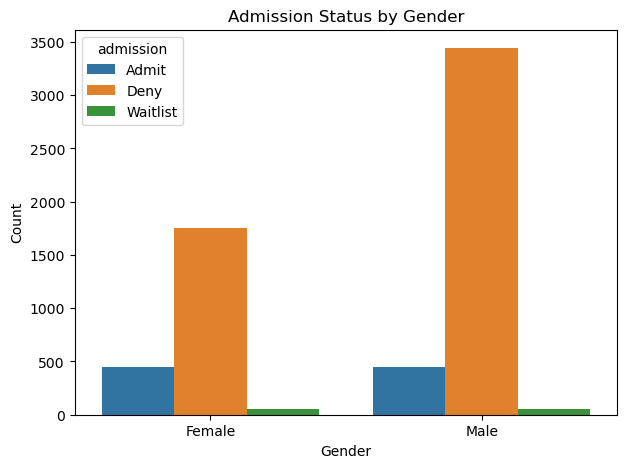

In [289]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='gender', hue='admission')
plt.title("Admission Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


The gender distribution revealed a balanced representation of admitted male and female applicants, indicating equal opportunities in the application process. However, there were more male applicants denied admission compared to their female counterparts.

- Major and Admission Status

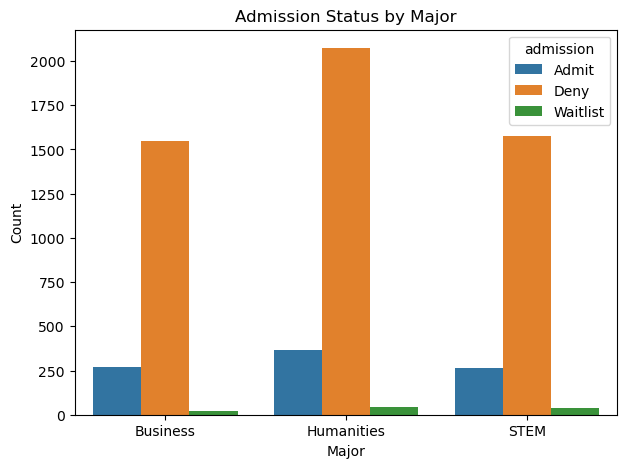

In [292]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='major', hue='admission')
plt.title("Admission Status by Major")
plt.xlabel("Major")
plt.ylabel("Count")
plt.show()

This count plot helps reveal which majors have higher admission rates. It also shows that Humanities, have more favorable outcomes.

- Admission Status of International vs. Domestic Applicants

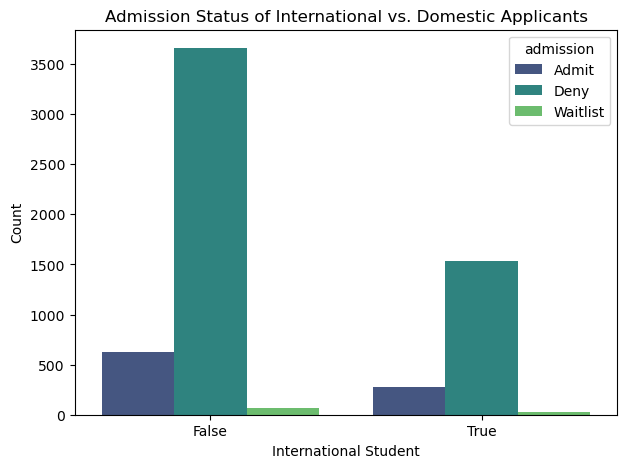

In [295]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='international', hue='admission', palette='viridis')
plt.title("Admission Status of International vs. Domestic Applicants")
plt.xlabel("International Student")
plt.ylabel("Count")
plt.show()

This plot shows the comparison in admission rates between international and domestic students. It indicates that domestic students have higher preferrence than international student.

- Work Industry Distribution by Admission Status

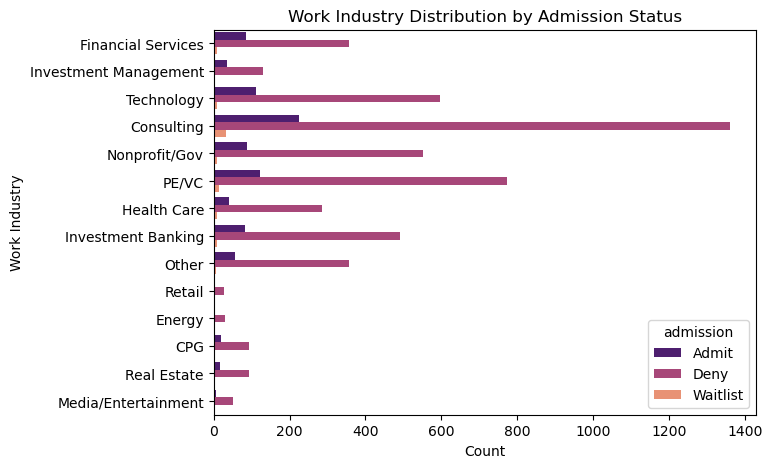

In [298]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, y='work_industry', hue='admission', palette='magma')
plt.title('Work Industry Distribution by Admission Status')
plt.xlabel('Count')
plt.ylabel('Work Industry')
plt.show()

This plot shows the comparison of work industries with respect to admission rates. It indicates that students with work experience in consulting have higher preferrence than other industrial work experience.

- Boxplot of GPA by Admission Status

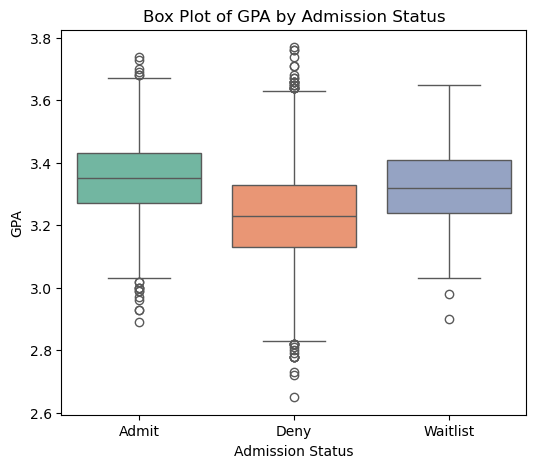

In [301]:
# Example boxplot for GPA by Admission Status with adjusted palette and hue
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='admission', y='gpa', hue='admission', palette="Set2", dodge=False)
plt.title('Box Plot of GPA by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GPA')
plt.legend([], [], frameon=False)  # Removes the redundant legend
plt.show()

Outliers are present in Admitted student, Deny student and student on the waiting list.

- Boxplot of GMAT by Admission Status

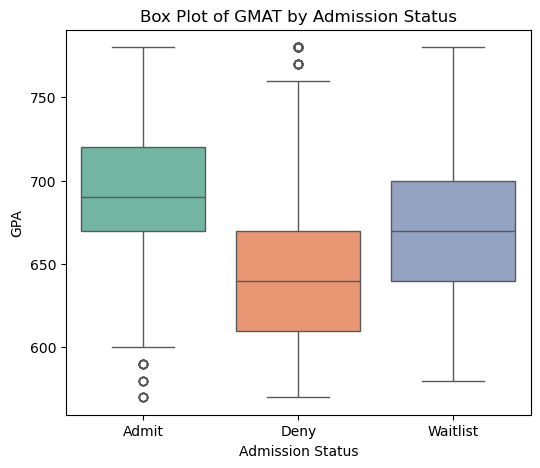

In [304]:
# Example boxplot for GPA by Admission Status with adjusted palette and hue
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='admission', y='gmat', hue='admission', palette="Set2", dodge=False)
plt.title('Box Plot of GMAT by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GPA')
plt.legend([], [], frameon=False)  # Removes the redundant legend
plt.show()

Outliers are present in Admitted student and Deny student only.

- Scatter plot of GMAT vs. GPA with Admission Status

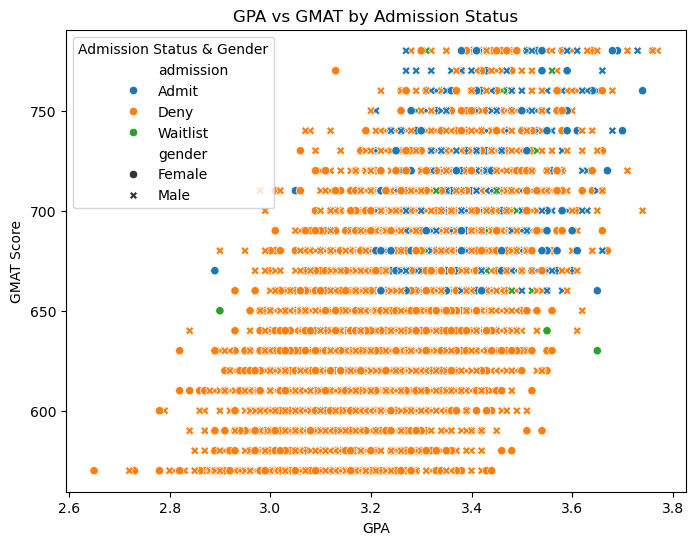

In [307]:
# Set plot size
plt.figure(figsize=(8, 6))

# GPA vs GMAT by Admission Status
sns.scatterplot(data=df, x='gpa', y='gmat', hue='admission', style='gender')
plt.title("GPA vs GMAT by Admission Status")
plt.xlabel("GPA")
plt.ylabel("GMAT Score")
plt.legend(title="Admission Status & Gender")
plt.show()

This scatter plot allows us to observe if there’s a correlation between GPA and GMAT scores and admission likelihood. Higher GPA and GMAT scores may indicate a stronger probability of admission.

- Correlation Analysis

In [310]:
# Calculate the correlation matrix for 'gpa', 'gmat', and 'work_exp'
correlation_matrix = df[['gpa', 'gmat', 'work_exp']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                gpa      gmat  work_exp
gpa       1.000000  0.577539  0.000346
gmat      0.577539  1.000000 -0.000999
work_exp  0.000346 -0.000999  1.000000


There a exist a moderate positive correlation (0.58) between GMAT and GPA

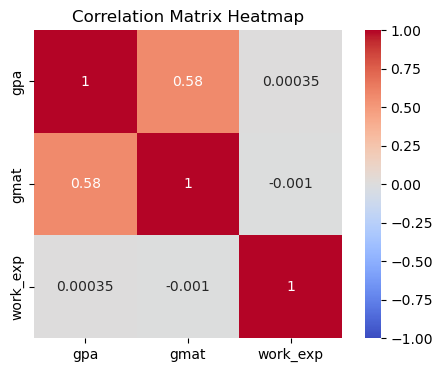

In [312]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

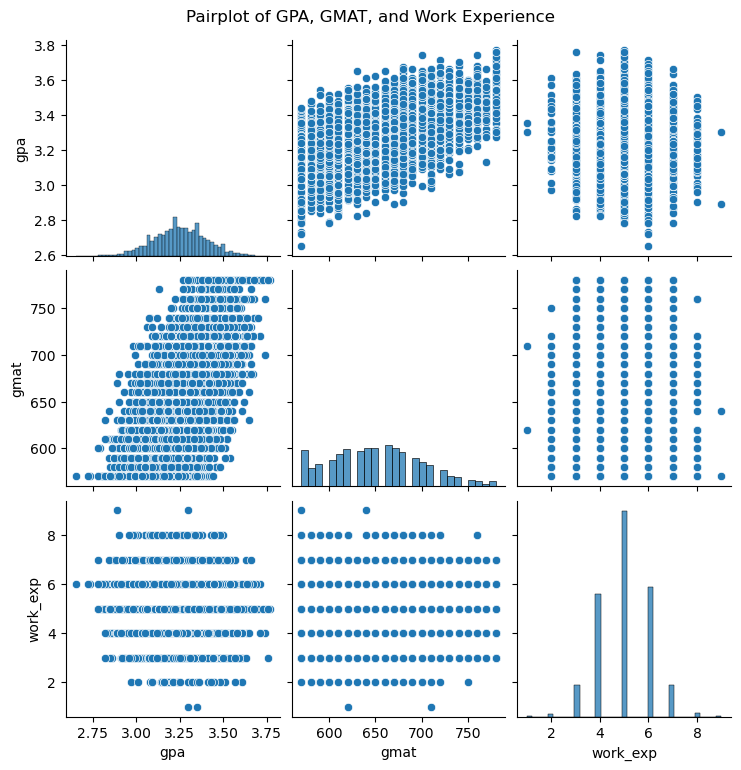

In [313]:
# Pairplot for pairwise correlation visualization
sns.pairplot(df[['gpa', 'gmat', 'work_exp']])
plt.suptitle('Pairplot of GPA, GMAT, and Work Experience', y=1.02)
plt.show()

This pairplot shows that there is positive correlation between GPA and GMAT, but no correlation exist between GPA and work experience, and GMAT and work experience.